# <center>Сравнение методов классификации</center>
Винник Екатерина Петровна, 22.М04
## Задача

- [+] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [ ] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блакнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [ ] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [ ] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [+] (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [ ] (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Чтение данных

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Возьмём данные заболеваний сердца у пациентов, которые можно скачать [тут](https://www.kaggle.com/code/ahmedadell30/heart-disease-prediction-with-ann-models/data).

Описание датасета: <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

## EDA

In [3]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

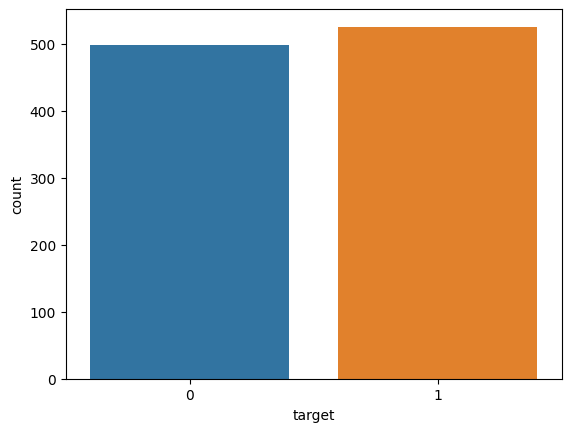

In [4]:
sns.countplot(x="target", data=df)
plt.show()

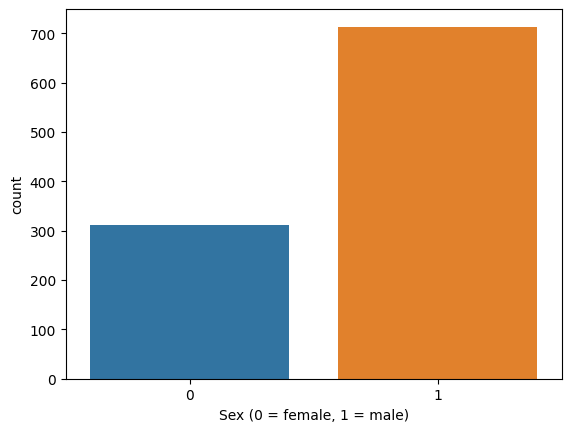

In [5]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


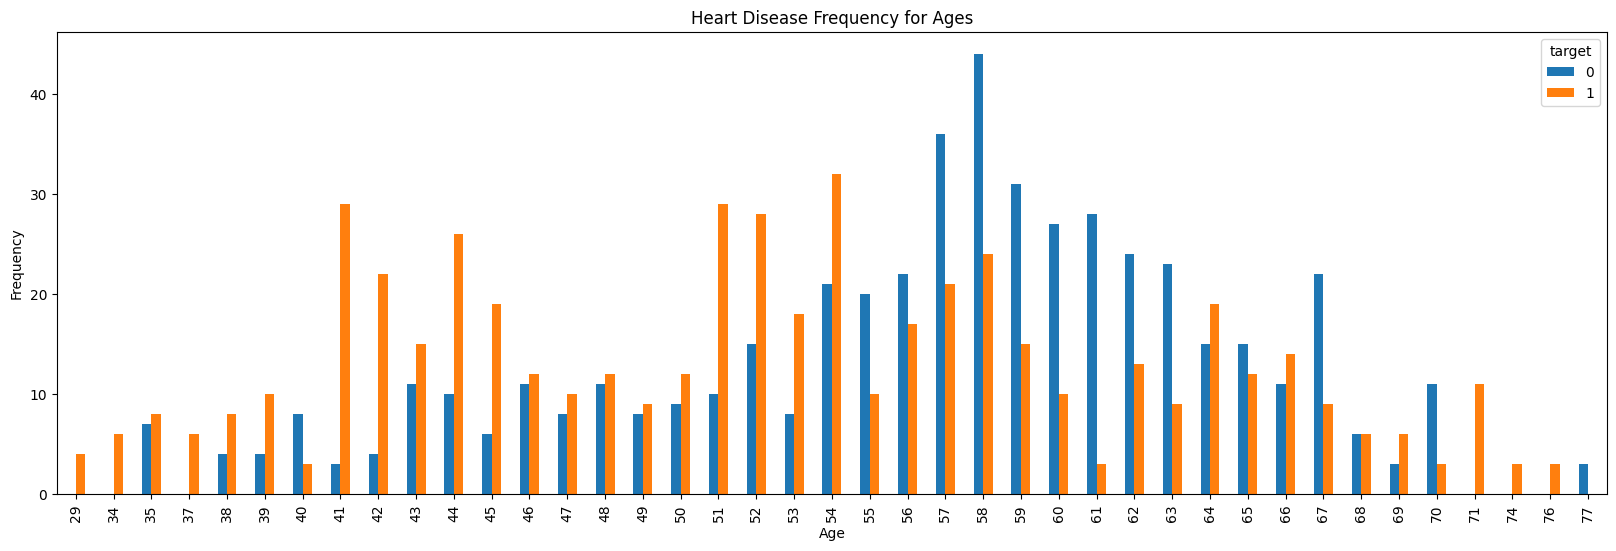

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

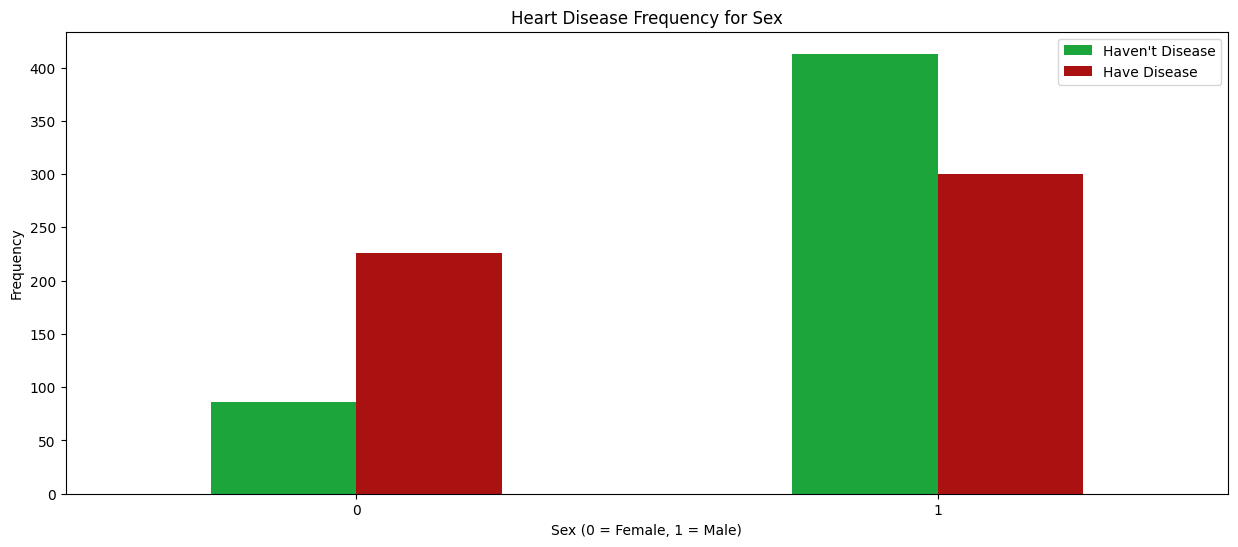

In [8]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

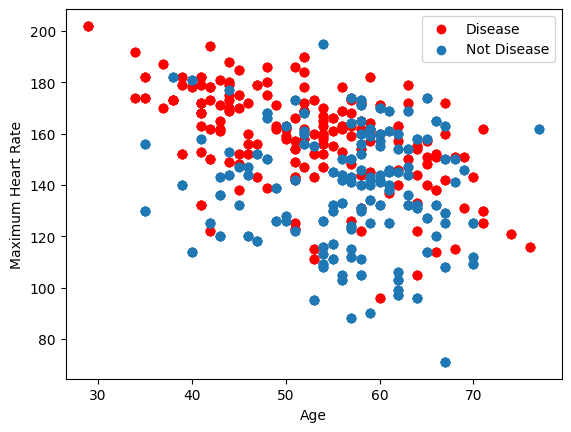

In [9]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

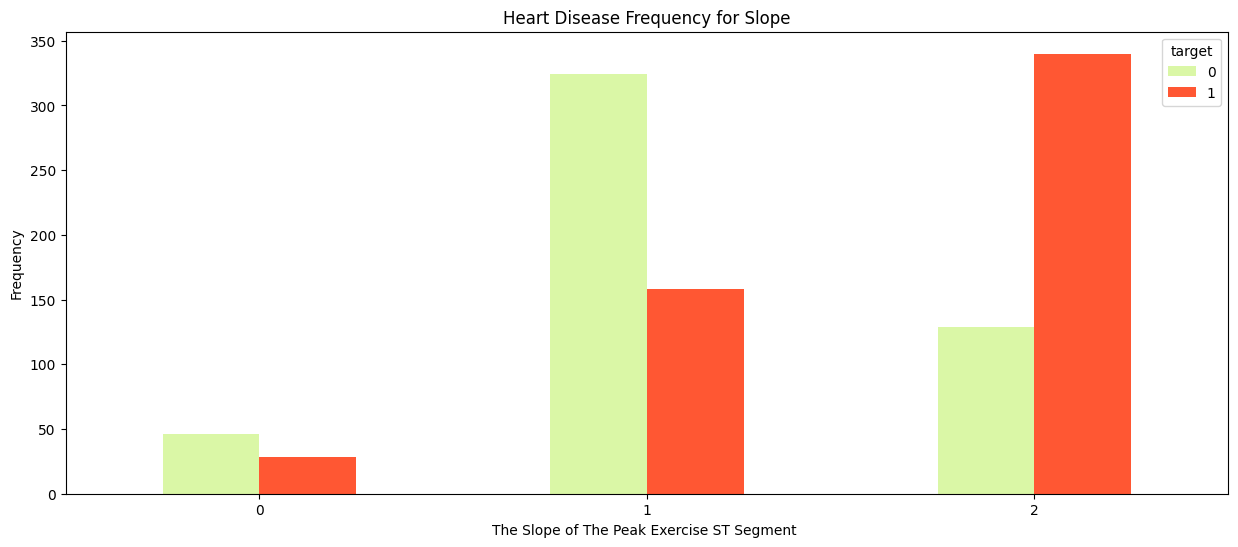

In [10]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

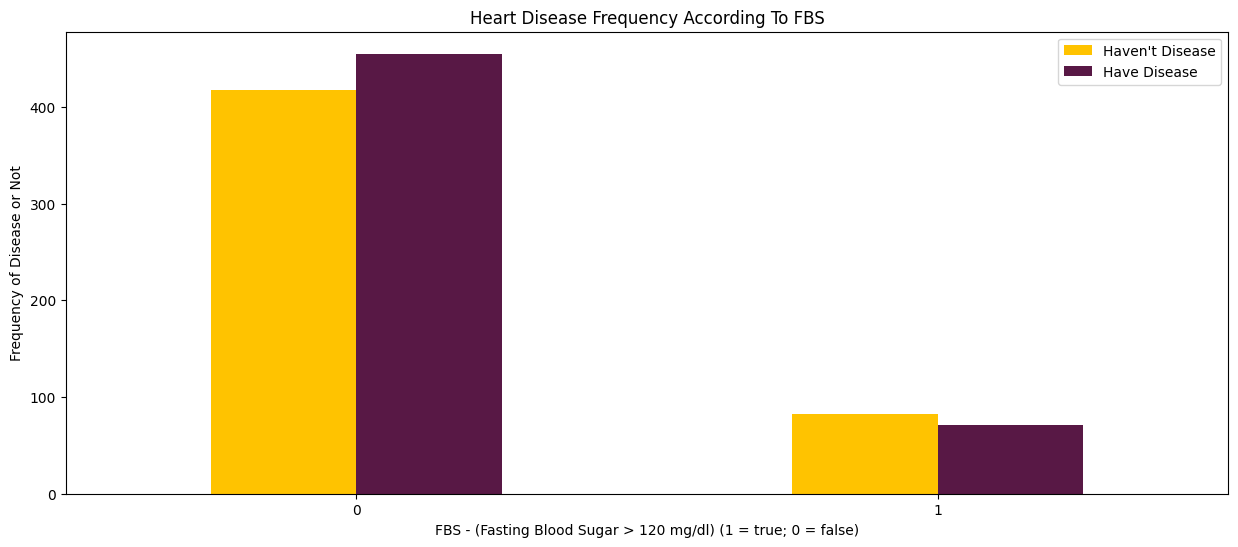

In [11]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

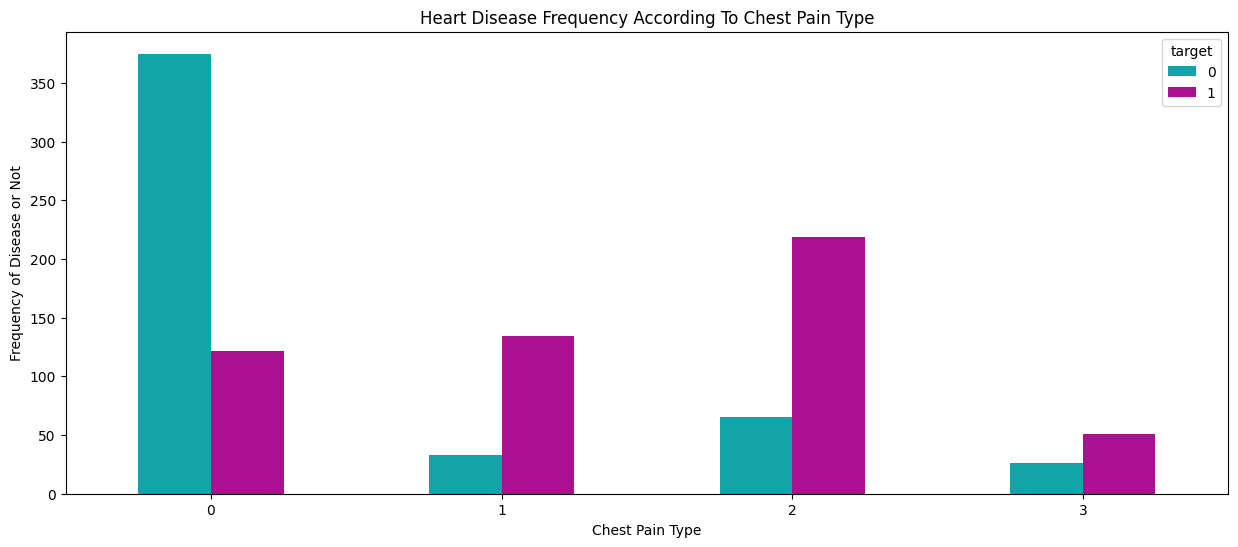

In [12]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Преобразование категориальных признаков

Закодируем категориальные признаки **cp**, **thal** и **slope**.

In [13]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [14]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Разбиение данных с использованием train_test_split и масштабирование

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std


accuracies = {}

def get_best_accuracy_from_estimators(dictionary, X, y):
    estimators = dictionary['estimator']
    max_accuracy = 0.
    for estimator in estimators:
        y_pred = estimator.predict(X)
        accuracy = accuracy_score(y, y_pred)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
    return max_accuracy        

def classification_using_cross_val(model):    
    # repeated k fold validation with tuned hyperparameters
    lr_accuracies = []
    max_accuracy = 0.
    number_of_folds = 0
    ks = range(2,20)
    for i in ks:
        cv = RepeatedKFold(n_splits=i, n_repeats=3, random_state=1)
        dictionary = cross_validate(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, return_estimator=True)
        accuracy = get_best_accuracy_from_estimators(dictionary, X_test_scaled, y_test)
        if (accuracy > max_accuracy):
            max_accuracy = accuracy
            number_of_folds = i
        lr_accuracies.append(accuracy)    
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, max_accuracy))
    plt.plot(ks,lr_accuracies)
    return (max_accuracy, number_of_folds)

def simple_classification(lr):
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    acc = accuracy_score(y_pred, y_test)
    print("Test Accuracy without repeated k-Fold Cross-Validation {:.4f}".format(acc))

Test Accuracy without repeated k-Fold Cross-Validation 0.8084
Test accuracy achieved with repeated 6 -Fold Cross-Validation: 0.828
Best C =  1.0
Best penalty =  l2
Test accuracy achieved with repeated 6 -Fold Cross-Validation: 0.828
Test accuracy achieved with repeated 6 -Fold Cross-Validation && tuned hyperparams: 0.828


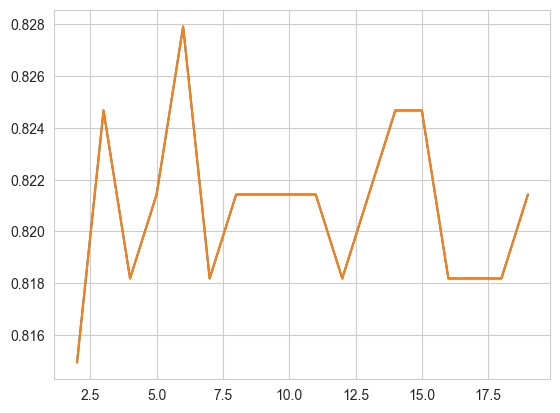

In [39]:
def logistic_regression_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet","none"]}
    searcher=GridSearchCV(LogisticRegression(random_state=42), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_C = searcher.best_params_["C"]
    best_penalty = searcher.best_params_["penalty"]
    print("Best C = ", best_C)
    print("Best penalty = ", best_penalty)
    model = LogisticRegression(C=best_C, penalty=best_penalty)
    #calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy
   
model = LogisticRegression()    
simple_classification(model)
(_, number_of_folds) = classification_using_cross_val(model)
acc = logistic_regression_using_cross_val_and_tuning_hp()
accuracies['Logistic Regression'] = acc


Кросс-валидация улучшила точность классификатора. 
Количество фолдов варьировалось с 2 до 20, на 6 фолдах достигается максимальная точность. 
Увеличение количества повторов кросс-валидации не дало улучшения (проверялось вручную). 
Тюнинг параметров C и penalty не произвел дополнительных улучшений. 

### Реализованная лог регр

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator

class MyLogisticRegression(BaseEstimator):
    def __init__(self, learning_rate=0.1, max_iter=1000, regularization='l2', C = 1, tolerance = 0.0001, _estimator_type='classifier'):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
        self._estimator_type = _estimator_type
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1] + 1)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        for _ in range(self.max_iter):  
            errors = (self.__sigmoid(X @ self.theta)) - y
            N = X.shape[1]

            if self.regularization is not None:
                delta_grad = self.learning_rate * ((self.C * (X.T @ errors)) + np.sum(self.theta))
            else:
                delta_grad = self.learning_rate * (X.T @ errors)

            if np.all(abs(delta_grad) >= self.tolerance):
                self.theta = self.theta - delta_grad / N
            else:
                break               
        return self
    def predict_proba(self, X):
        return self.__sigmoid((X @ self.theta[1:]) + self.theta[0])    
    
    def predict(self, X):
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def set_params(self, learning_rate=0.1, max_iter=1000, regularization='l2', C = 1, tolerance = 0.0001, _estimator_type='classifier'):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
        self._estimator_type = _estimator_type
        return self

    def get_params(self, deep=False):
            params = dict()
            params['learning_rate'] = self.learning_rate
            params['C'] = self.C
            params['max_iter'] = self.max_iter
            params['regularization'] = self.regularization
            params['tolerance'] = self.tolerance
            params['_estimator_type'] = self._estimator_type
            return params

Accuracy  0.8084415584415584 0.8870292887029289
Test accuracy achieved with repeated 7 -Fold Cross-Validation: 0.831
Best C =  1.0
Best regularization =  l2
Test accuracy achieved with repeated 7 -Fold Cross-Validation: 0.831
Test accuracy achieved with repeated 7 -Fold Cross-Validation && tuned hyperparams: 0.831


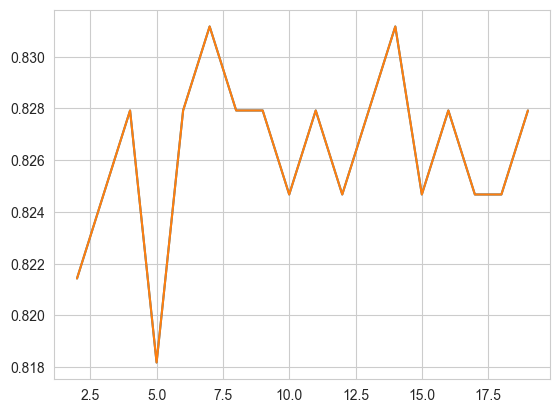

In [33]:
def simple_my_logistic_regression():
    m = MyLogisticRegression()
    m.fit(X_train_scaled, y_train)
    y_pred = m.predict(X_test_scaled)
    y_pred_train = m.predict(X_train_scaled)
    print("Accuracy ", accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train))

def my_logistic_regression_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    grid={"C":np.logspace(-3,3,7), "regularization":["l2", None]}
    searcher=GridSearchCV(MyLogisticRegression(), grid, scoring='accuracy', cv=7, error_score='raise')
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_C = searcher.best_params_["C"]
    best_penalty = searcher.best_params_["regularization"]
    print("Best C = ", best_C)
    print("Best regularization = ", best_penalty)
    model = MyLogisticRegression(C=best_C, regularization=best_penalty)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

simple_my_logistic_regression()
classification_using_cross_val(MyLogisticRegression())
acc = my_logistic_regression_using_cross_val_and_tuning_hp()
accuracies['My Logistic Regression'] = acc

## K-Nearest Neighbour (KNN) Classification

Test Accuracy without repeated k-Fold Cross-Validation 0.8442
Test accuracy achieved with repeated 5 -Fold Cross-Validation: 0.873
Best n neighbors =  7
Best penalty =  distance
Best metric =  manhattan
Test accuracy achieved with repeated 3 -Fold Cross-Validation: 0.990
Test accuracy achieved with repeated 3 -Fold Cross-Validation && tuned hyperparams: 0.990


0.9902597402597403

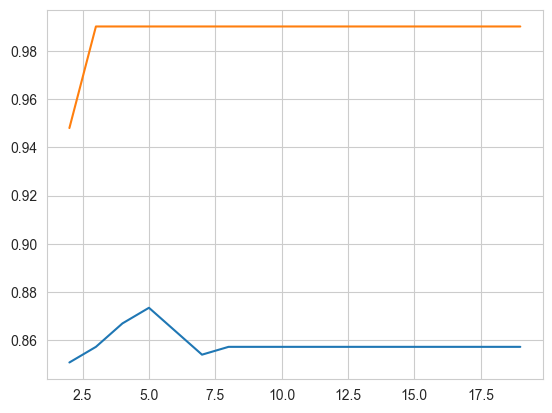

In [83]:
from sklearn.neighbors import KNeighborsClassifier

def knn_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    n_neighbors = range(1, 21, 2)
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']
    # define grid search
    grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
    searcher=GridSearchCV(KNeighborsClassifier(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_neighbors = searcher.best_params_['n_neighbors']
    best_weights = searcher.best_params_['weights']
    best_metric = searcher.best_params_['metric']
    print("Best n neighbors = ", best_neighbors)
    print("Best penalty = ", best_weights)
    print("Best metric = ", best_metric)
    model = KNeighborsClassifier(n_neighbors=best_neighbors, weights=best_weights, metric=best_metric)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

knn = KNeighborsClassifier()
simple_classification(knn)
classification_using_cross_val(knn)
knn_using_cross_val_and_tuning_hp()

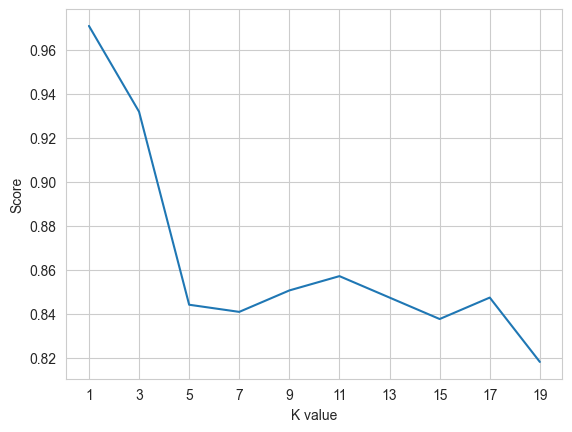

Maximum KNN Score is 0.9708


In [84]:
scoreList = []
for i in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))
    
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.4f}".format(acc))

### Реализованный knn

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class MyKNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy
    
    def set_params(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        return self
        
    def get_params(self, deep=False):
        params = dict()
        params['k'] = self.k
        params['dist_metric'] = self.dist_metric
        return params
    

Test Accuracy without repeated k-Fold Cross-Validation 0.8442
Test accuracy achieved with repeated 5 -Fold Cross-Validation: 0.873
Best n neighbors =  1
Test accuracy achieved with repeated 11 -Fold Cross-Validation: 0.974
Test accuracy achieved with repeated 11 -Fold Cross-Validation && tuned hyperparams: 0.974


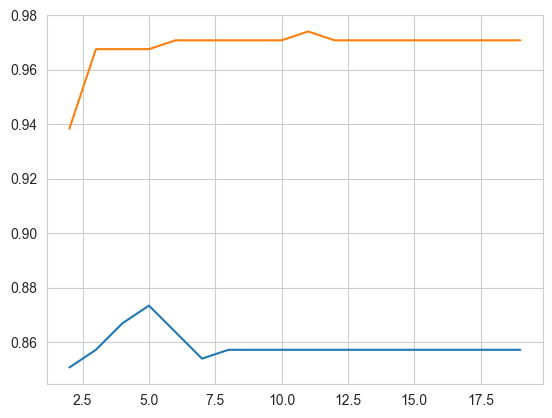

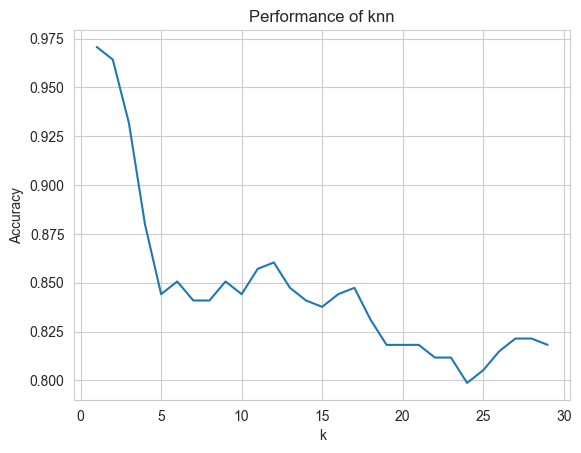

In [87]:
def knn_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    k = range(1, 21, 2)
    # define grid search
    grid = dict(k=k)
    searcher=GridSearchCV(MyKNeighborsClassifier(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_neighbors = searcher.best_params_['k']
    print("Best n neighbors = ", best_neighbors)
    model = MyKNeighborsClassifier(k=best_neighbors)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

myknn = MyKNeighborsClassifier()
simple_classification(myknn)
classification_using_cross_val(myknn)
knn_using_cross_val_and_tuning_hp()

knn_accuracies = []
ks = range(1, 30)
for my_k in ks:
    knn = MyKNeighborsClassifier(k=my_k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.evaluate(X_test_scaled, y_test)
    accuracy_train = knn.evaluate(X_train_scaled, y_train)
    knn_accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, knn_accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

## Support Vector Machine (SVM)

Test Accuracy without repeated k-Fold Cross-Validation 0.8961
Test accuracy achieved with repeated 16 -Fold Cross-Validation: 0.912
Test accuracy achieved with repeated 9 -Fold Cross-Validation: 0.994
Test accuracy achieved with repeated 9 -Fold Cross-Validation && tuned hyperparams: 0.994


0.9935064935064936

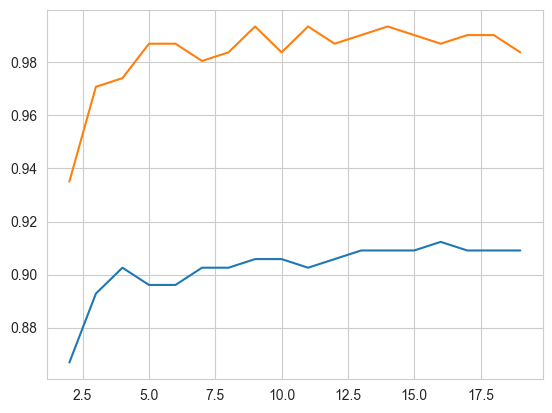

In [94]:
from sklearn.svm import SVC

def svm_using_cross_val_and_tuning_hp():
    # define model and parameters
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']
    # define grid search
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    searcher=GridSearchCV(SVC(random_state=12), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(searcher)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy
    

svm = SVC(random_state = 12)
simple_classification(svm)
classification_using_cross_val(svm)
svm_using_cross_val_and_tuning_hp()

## Naive Bayes Algorithm

Test Accuracy without repeated k-Fold Cross-Validation 0.6688
Test accuracy achieved with repeated 2 -Fold Cross-Validation: 0.825
Test accuracy achieved with repeated 8 -Fold Cross-Validation: 0.834
Test accuracy achieved with repeated 8 -Fold Cross-Validation && tuned hyperparams: 0.834


0.8344155844155844

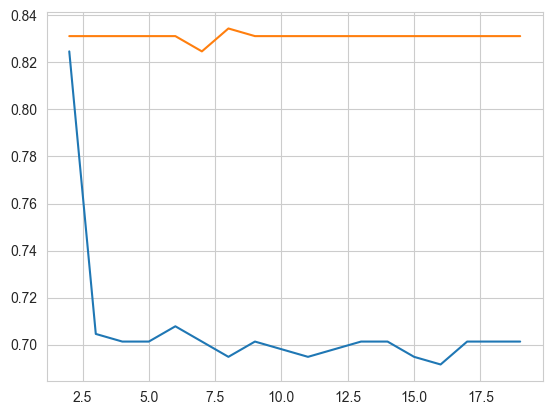

In [101]:
from sklearn.naive_bayes import GaussianNB

def nb_using_cross_val_and_tuning_hp():
    grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    searcher=GridSearchCV(GaussianNB(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(searcher)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy
    
nb = GaussianNB()
simple_classification(nb)
classification_using_cross_val(nb)
nb_using_cross_val_and_tuning_hp()


## Decision Tree Algorithm

Test Accuracy without repeated k-Fold Cross-Validation 0.9805
Test accuracy achieved with repeated 12 -Fold Cross-Validation: 0.990
Test accuracy achieved with repeated 14 -Fold Cross-Validation: 0.938
Test accuracy achieved with repeated 14 -Fold Cross-Validation && tuned hyperparams: 0.938


0.9383116883116883

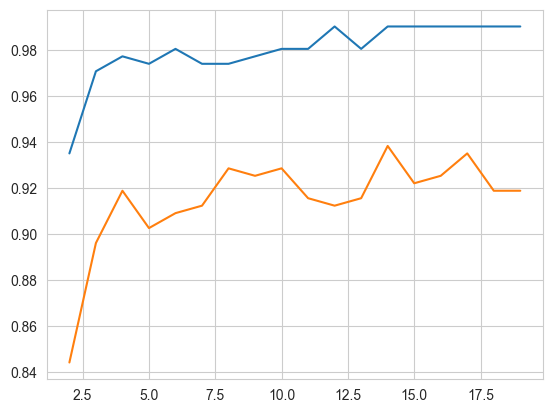

In [103]:
from sklearn.tree import DecisionTreeClassifier

def dtc_using_cross_val_and_tuning_hp():
    grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    }
    searcher=GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(searcher)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

dtc = DecisionTreeClassifier()
simple_classification(dtc)
classification_using_cross_val(dtc)
dtc_using_cross_val_and_tuning_hp()

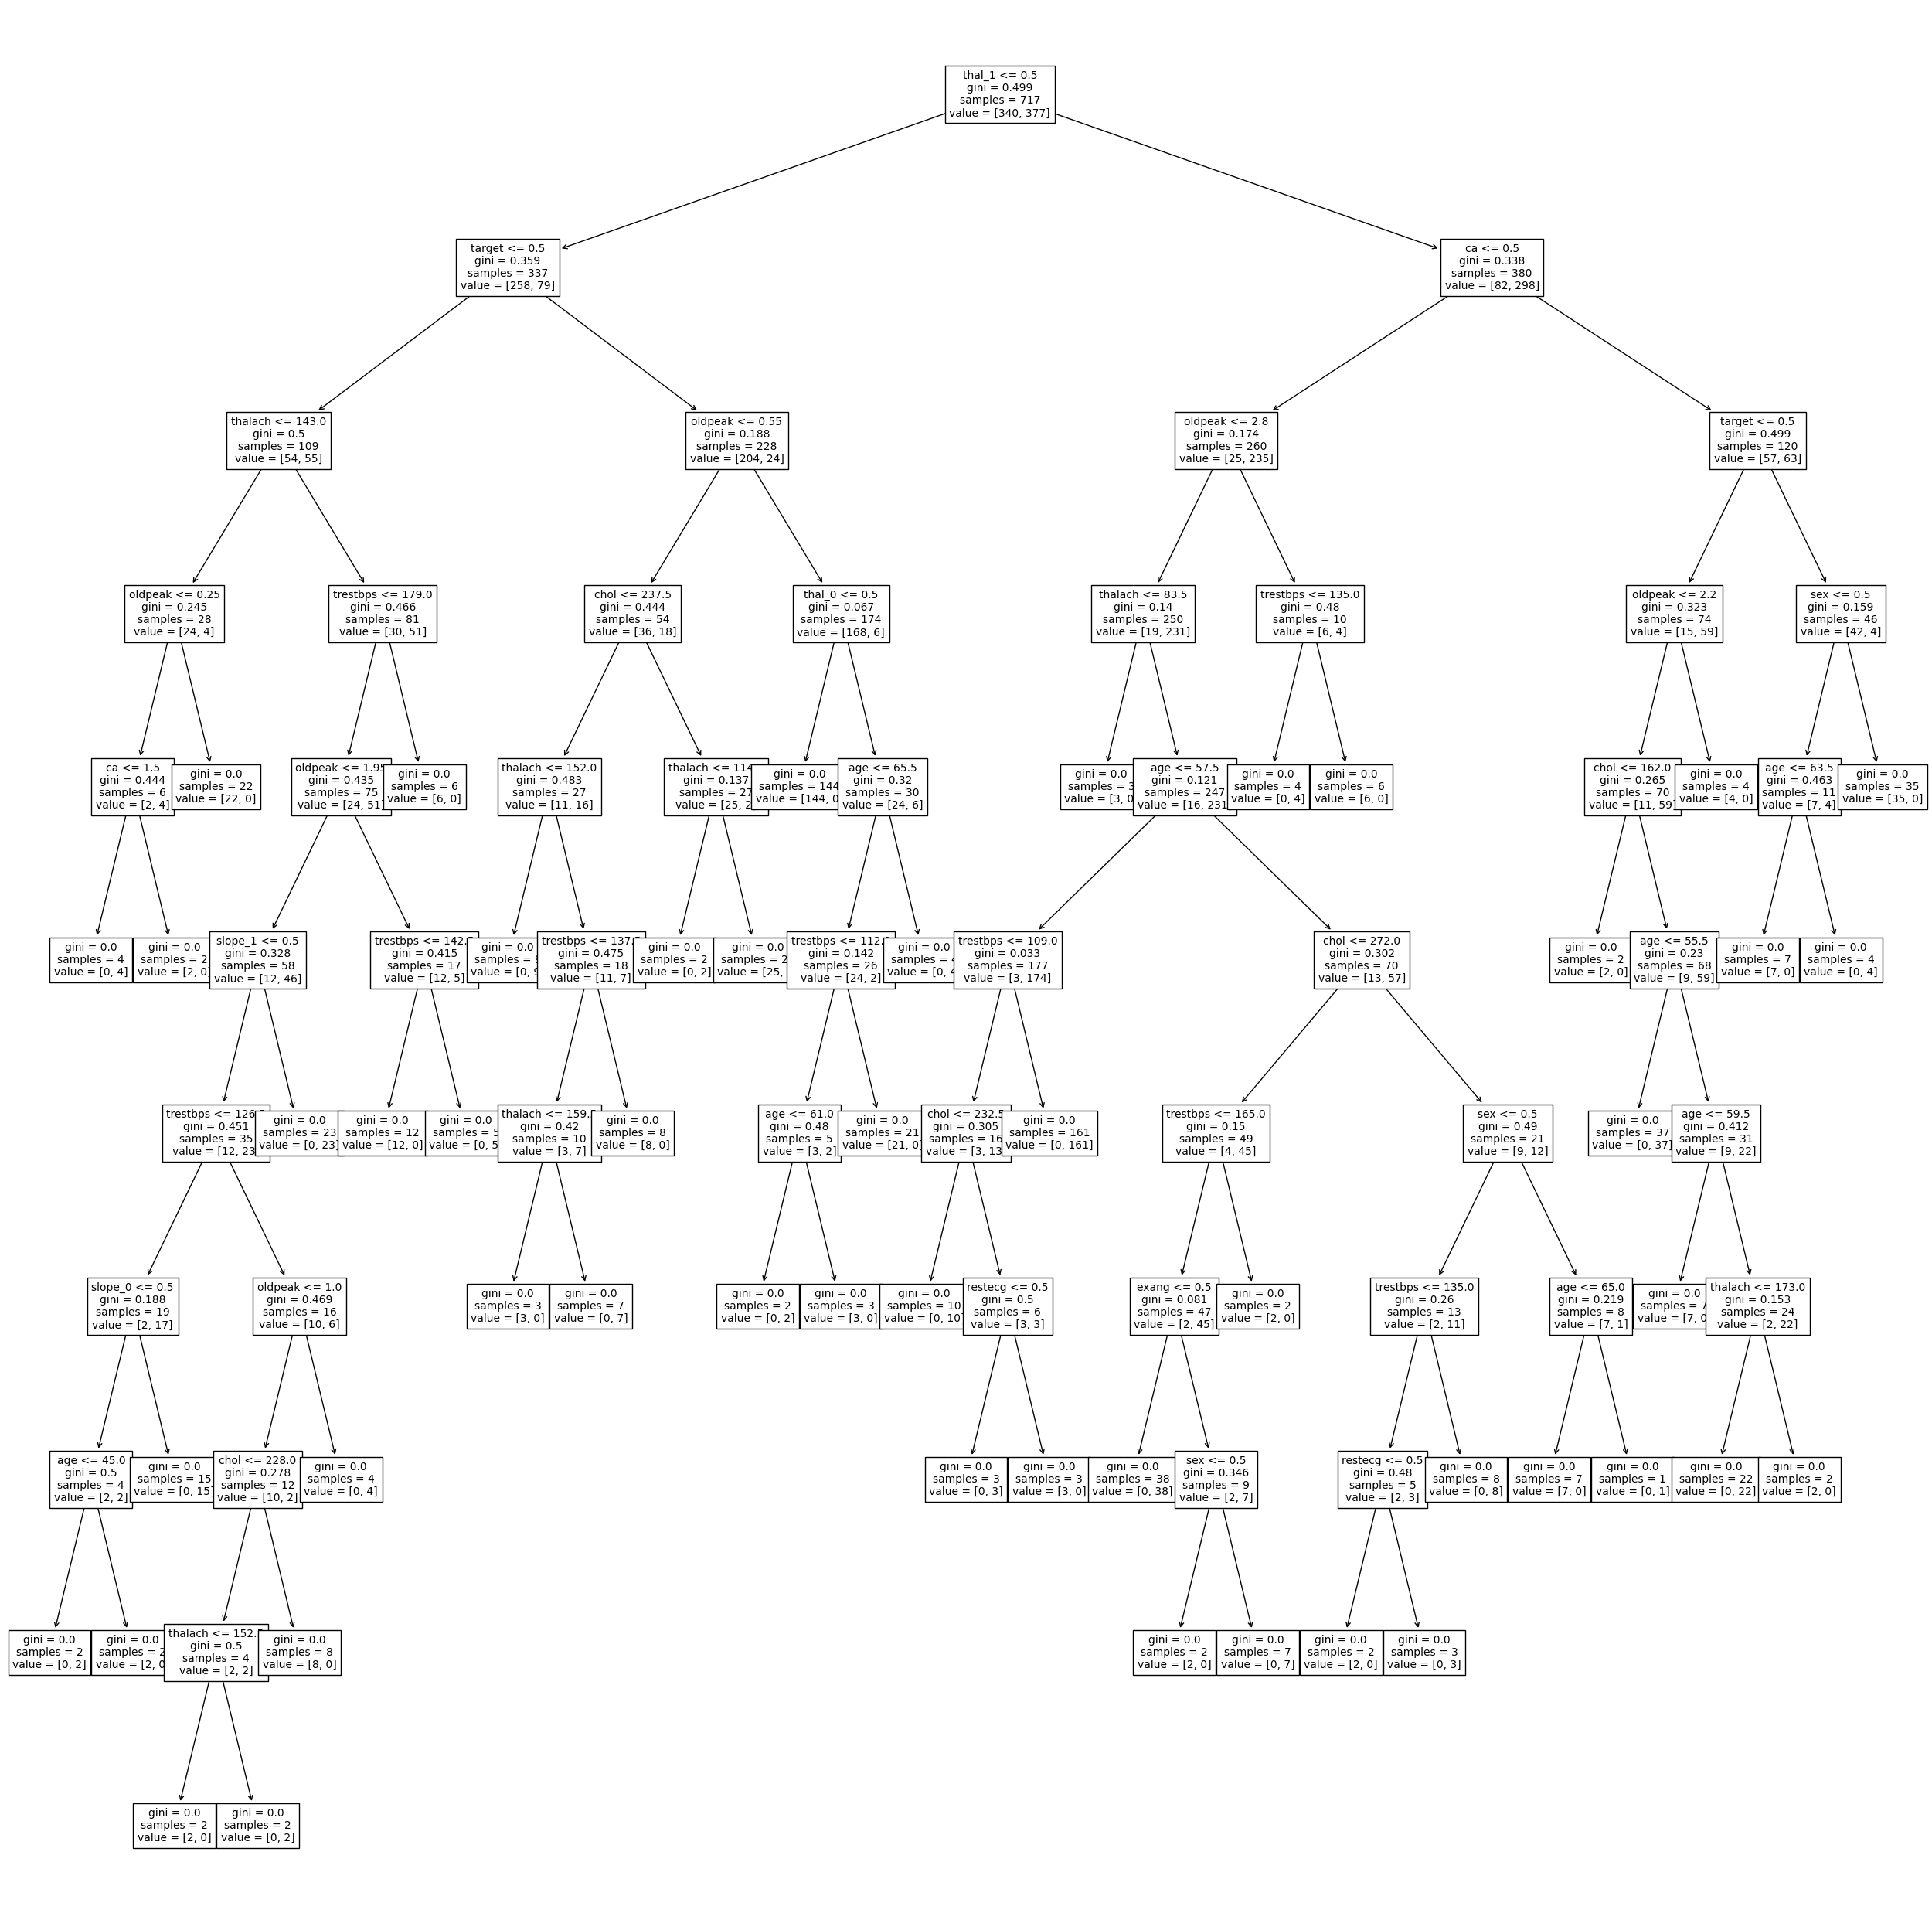

In [27]:
from sklearn import tree

plt.figure(figsize=(32, 32))
tree.plot_tree(dtc, feature_names=df.columns,fontsize=10);

## Comparing Models

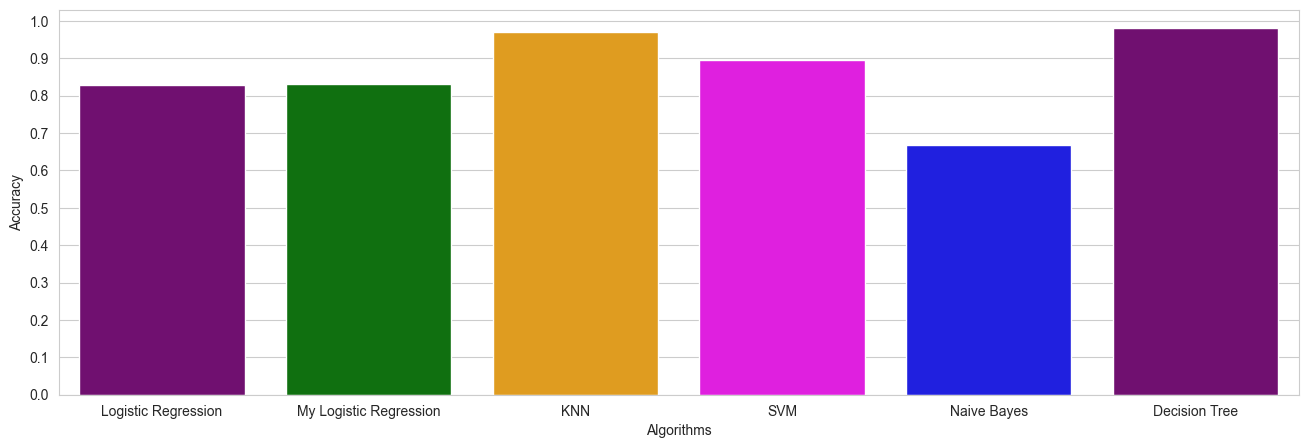

In [28]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [104]:
# Predicted values
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

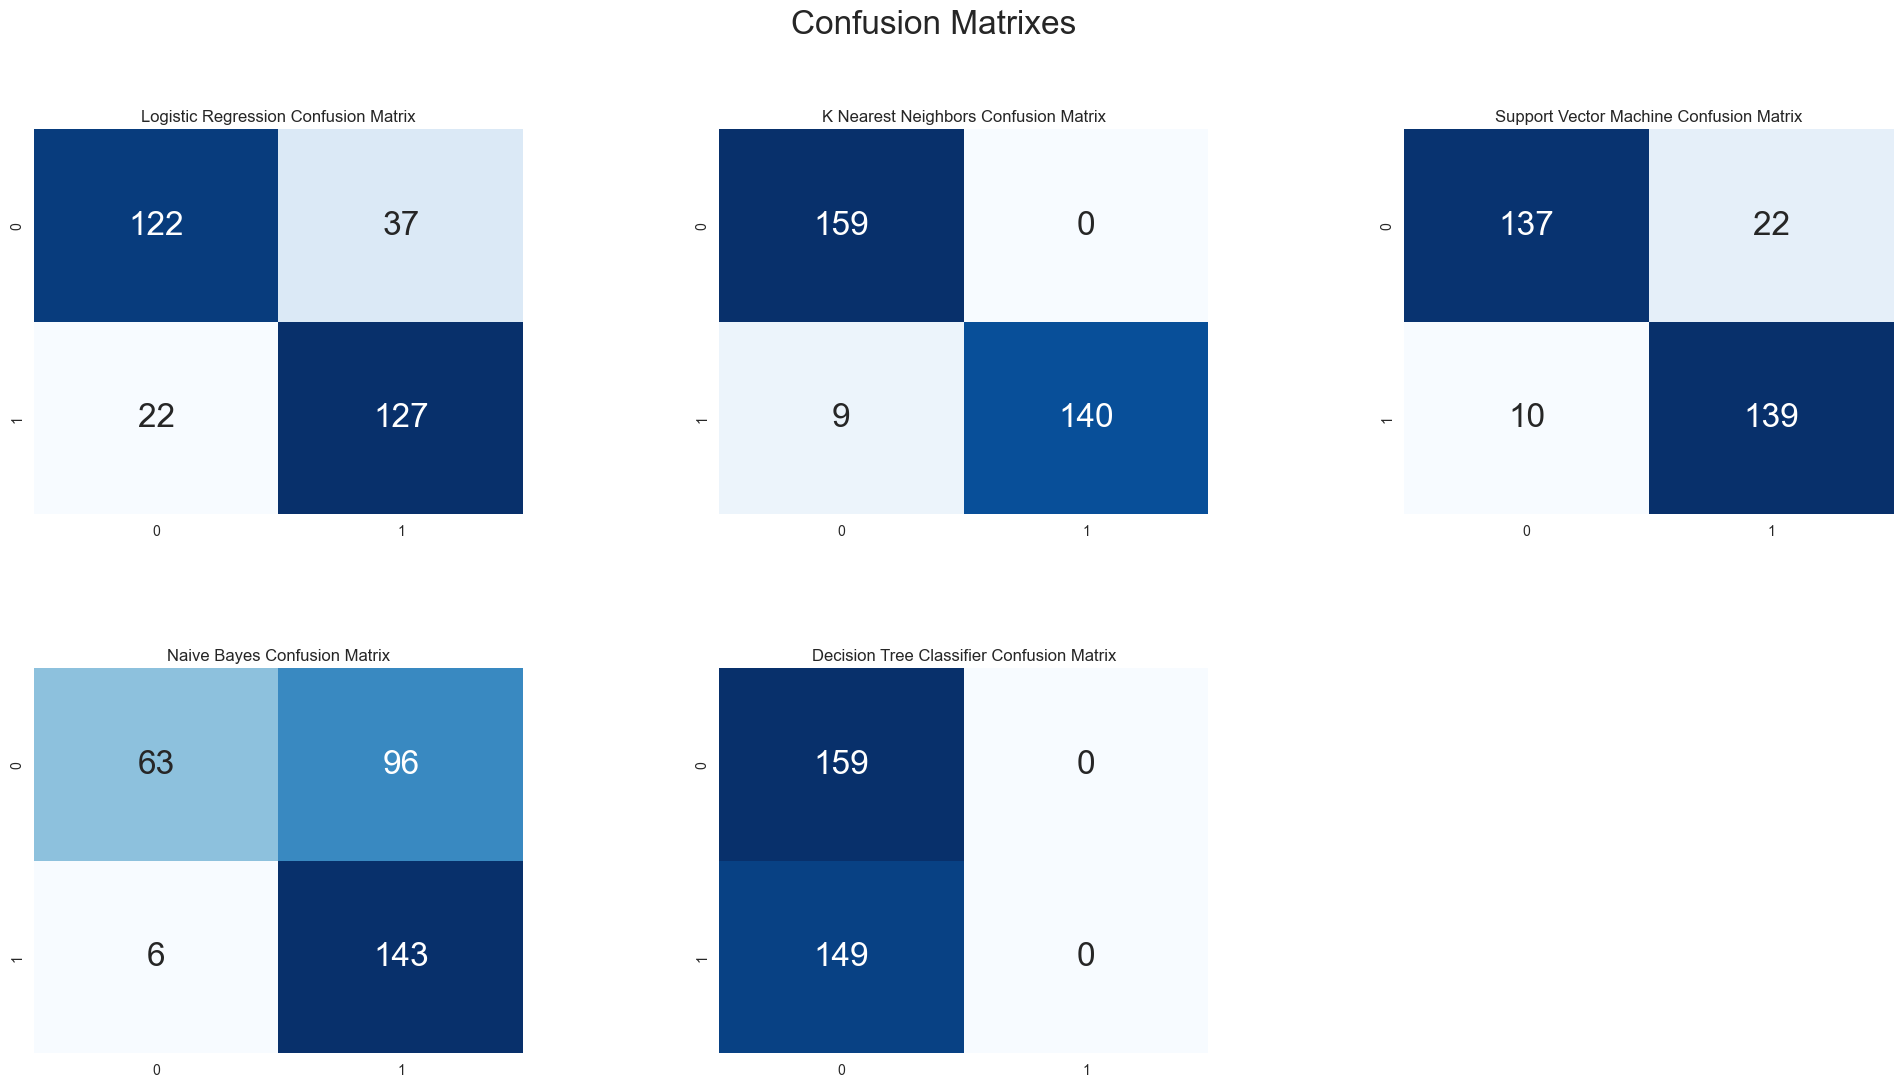

In [106]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Для более честного сравнения необходимо подбирать гиперпараметры для каждой модели отдельно и сравнивать их лучшие варианты. Кроме того, вместо одного случайного разбиения на Test и Train необходимо использовать кросс-валидацию.